In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import json

Begin by defining the output parsing function for usage

Define overnight output file location and parse into dictionary

In [3]:
OVERNIGHT_FILE = '/home/buck06191/Desktop/optimisation_edit.json'
with open(OVERNIGHT_FILE) as f:
    optim_data = json.load(f)
# Check length of each dict section before converting to pandas DF
import copy
x = copy.copy(optim_data)
{k:len(x[k]) for k in x.keys()}

{'Cortex': 286,
 'Final_Distance': 286,
 'Max_Demand': 286,
 'R_autc': 286,
 'R_auto': 286,
 'R_autp': 286,
 'R_autu': 286,
 'Subject': 286,
 't_c': 286,
 't_o': 286,
 't_p': 286,
 't_u': 286}

In [5]:
overnight_df = pd.DataFrame(optim_data)

Define a function that lets us pull out the optimal fit for a specific cortex

In [6]:
def optimal_fit(xx, cortex):
    df = xx.loc[xx['Cortex']==cortex]
    return df.loc[df['Final_Distance']==df['Final_Distance'].min()]

In [7]:
df_PFC = overnight_df.loc[overnight_df['Cortex']=='PFC']

df_VC = overnight_df.loc[overnight_df['Cortex']=='VC']
optimal_PFC = df_PFC.loc[df_PFC.groupby(['Subject', 'Max_Demand']).Final_Distance.agg('idxmin')]
optimal_PFC

,Cortex,Final_Distance,Max_Demand,R_autc,R_auto,R_autp,R_autu,Subject,t_c,t_o,t_p,t_u
255,PFC,6.195697,1.0,1.563017,1.959744,4.803173,0.472895,P11,6.438027,21.325728,6.019303,0.642275
179,PFC,10.208966,1.1,1.560094,1.921937,4.964348,0.438660,P11,6.409234,14.737230,4.966353,0.532556
207,PFC,13.944531,1.2,1.604058,1.884541,5.019998,0.412560,P11,6.163953,15.261951,3.953412,0.461357
231,PFC,16.995106,1.3,1.587783,1.891116,5.197086,0.400480,P11,6.013515,17.715816,5.973495,0.645978
208,PFC,21.917251,1.4,1.624444,1.933047,5.082284,0.401548,P11,6.237209,21.528413,6.467041,0.638814
83,PFC,26.045178,1.5,1.643413,1.875358,5.127953,0.404872,P11,6.260404,14.005663,4.178590,0.481915
192,PFC,28.854091,1.6,1.614310,1.999645,5.190076,0.402627,P11,6.401354,14.986166,4.509350,0.614465
247,PFC,35.994290,1.7,1.765249,1.929190,5.189365,0.418802,P11,6.035616,14.425241,4.340306,0.683417
139,PFC,40.082021,1.8,1.519556,1.996341,5.188230,0.428767,P11,5.817282,14.064691,4.384709,0.642087
264,PFC,42.624146,1.9,1.636864,1.945413,5.130129,0.401264,P11,6.053325,15.567831,6.217210,0.686720


In [8]:
optimal_VC = df_VC.loc[df_VC.groupby(['Subject', 'Max_Demand']).Final_Distance.agg('idxmin')]

Cortex  Max_Demand
PFC     1.0          -0.212942
        1.1          -0.459880
        1.2          -0.243411
        1.3          -0.269683
        1.4           0.012361
        1.5          -0.249515
        1.6          -0.308083
        1.7          -0.302555
        1.8          -0.206488
        1.9          -0.506757
        2.0          -0.247691
VC      1.0          -0.277530
        1.1          -0.094430
        1.2          -0.216465
        1.3          -0.257322
        1.4          -0.212117
        1.5           0.067069
        1.6          -0.315757
        1.7          -0.319581
        1.8          -0.291640
        1.9          -0.265559
        2.0          -0.258613
Name: R_autc, dtype: float64


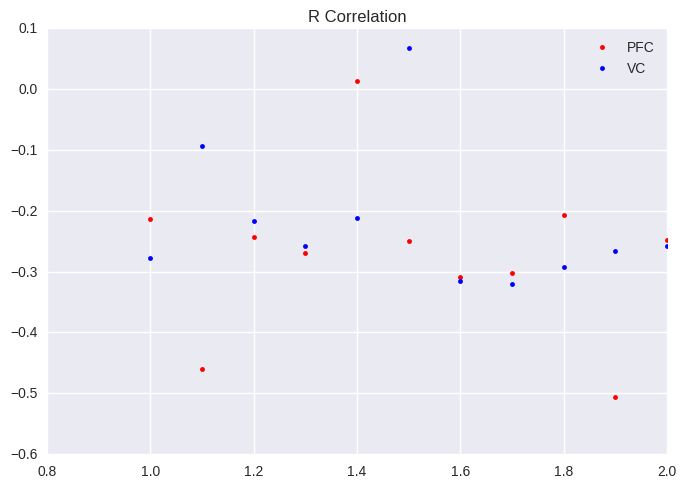

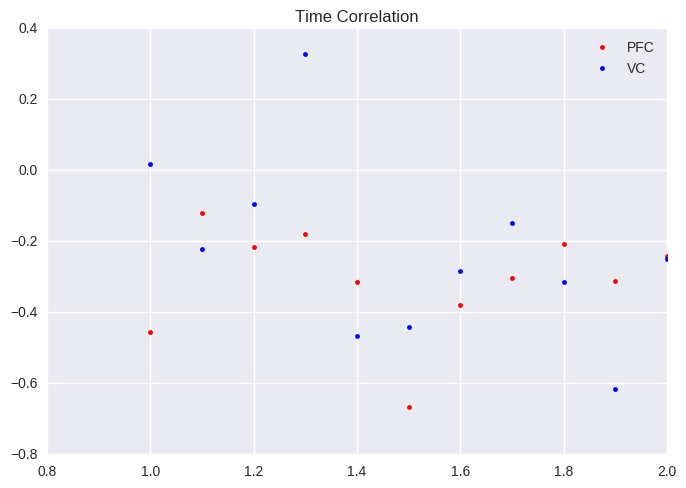

In [9]:

df = result = pd.concat([optimal_VC, optimal_PFC])
R_corr = df.groupby(['Cortex', 'Max_Demand'])['R_autc'].apply(lambda x: x.corr(df['R_autp']))
t_corr = df.groupby(['Cortex', 'Max_Demand'])['t_c'].apply(lambda x: x.corr(df['t_p']))
print(R_corr)
plt.figure()
plt.plot(R_corr.index.levels[1], R_corr.ix['PFC'], '.r', label='PFC')
plt.plot(R_corr.index.levels[1], R_corr.ix['VC'], '.b', label='VC')
plt.title('R Correlation')
plt.legend()

plt.figure()
plt.plot(t_corr.index.levels[1], t_corr.ix['PFC'], '.r', label='PFC')
plt.title('Time Correlation')
plt.plot(t_corr.index.levels[1], t_corr.ix['VC'], '.b', label='VC')
plt.legend()

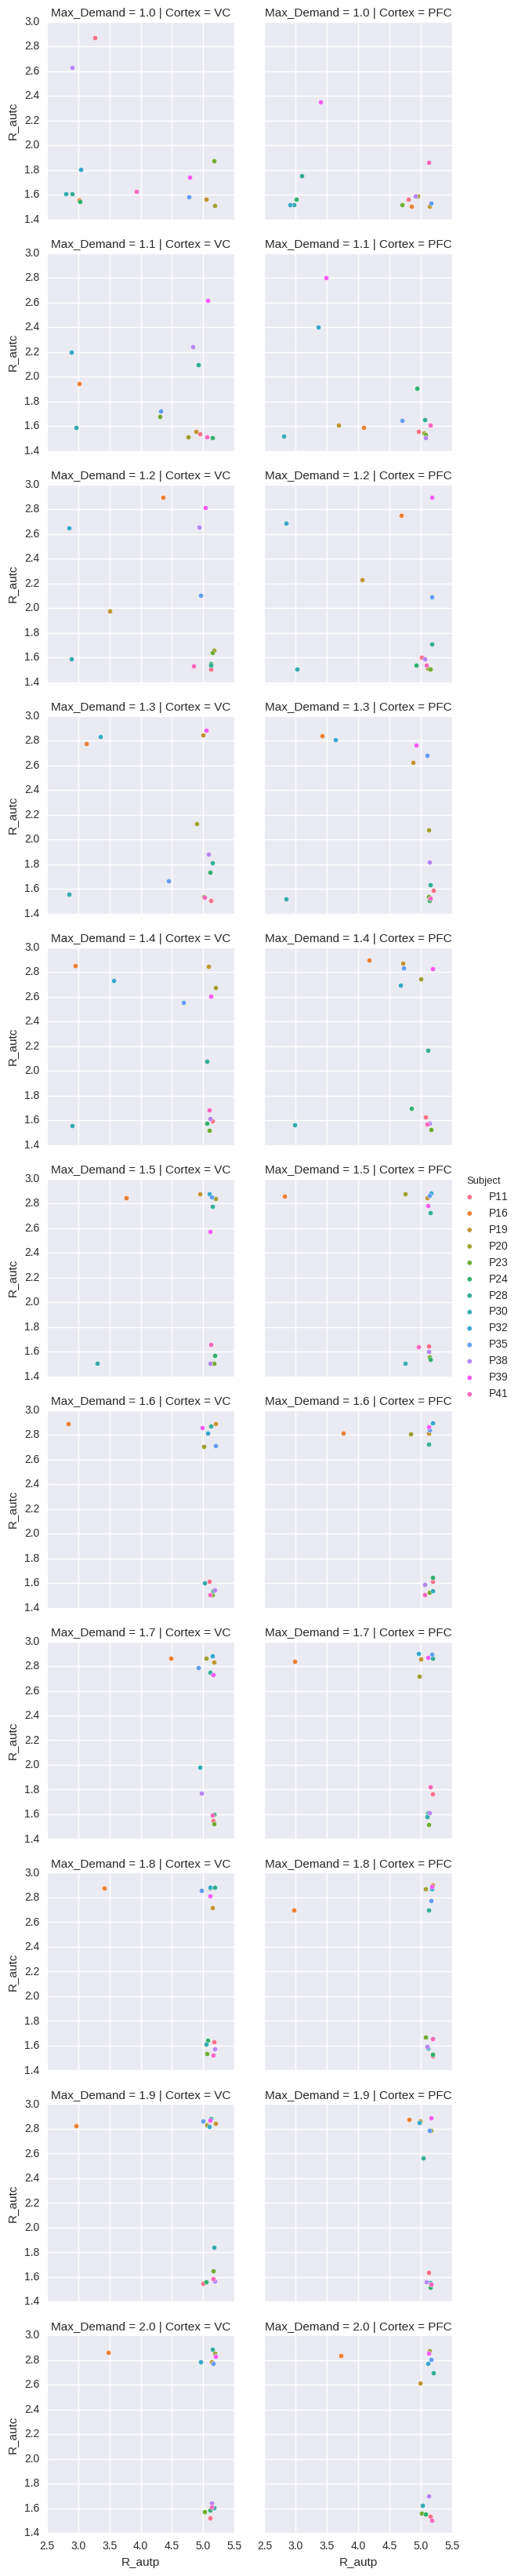

In [10]:
g = sns.FacetGrid(df, col="Cortex", row='Max_Demand', hue='Subject')
g = (g.map(plt.scatter, "R_autp", "R_autc", edgecolor="w")).add_legend()

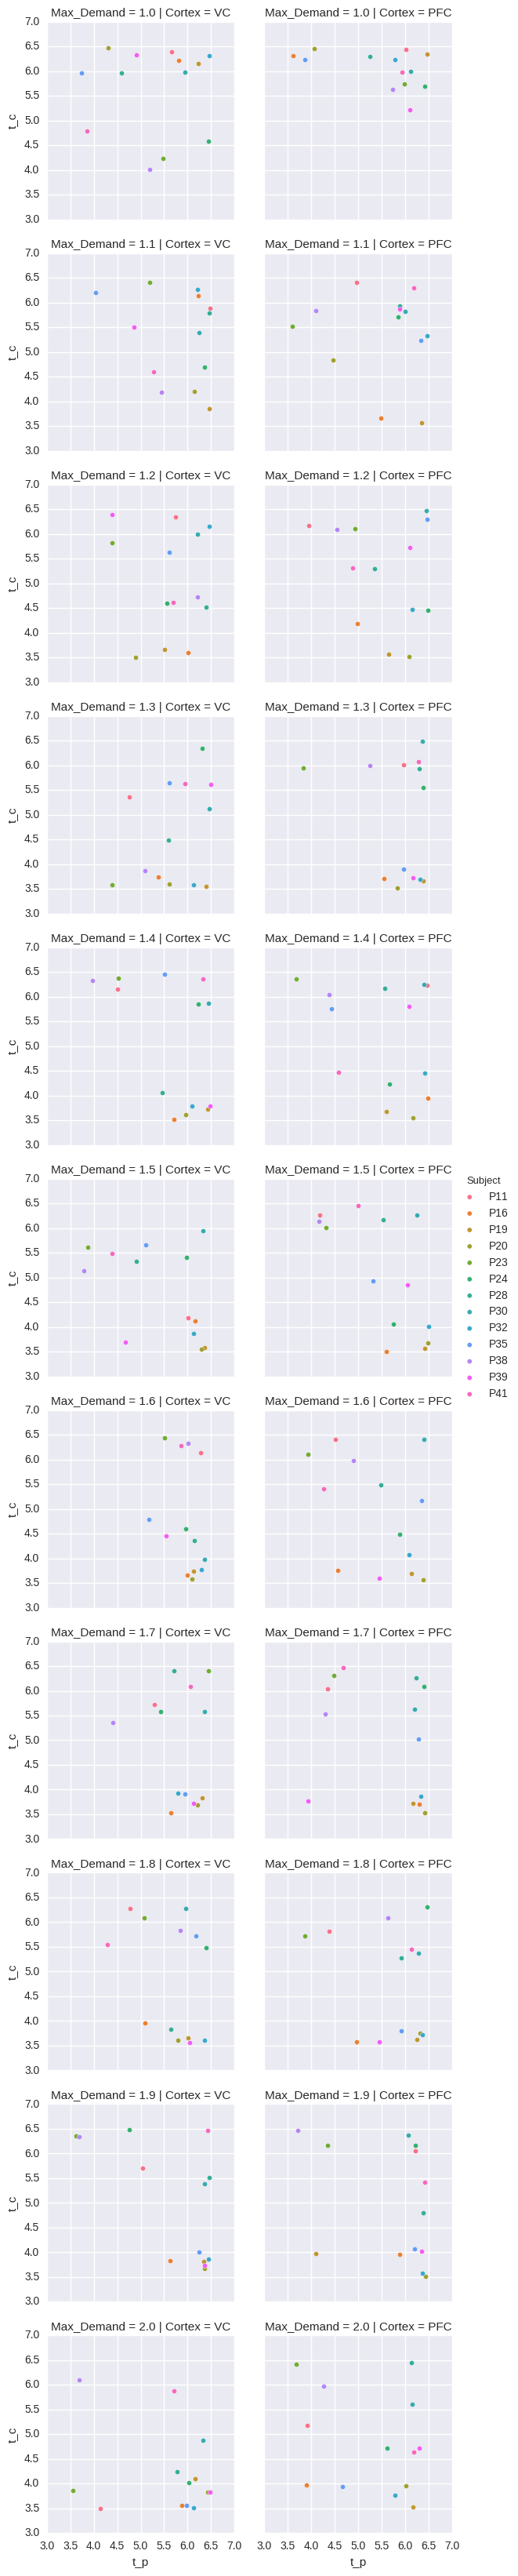

In [11]:
g = sns.FacetGrid(df, col="Cortex", row='Max_Demand', hue='Subject')
g = (g.map(plt.scatter, "t_p", "t_c", edgecolor="w")).add_legend()

## Visualising the results

It makes sense to try and visualise the results as a whole. Knowing the single best fit for each cortex doesn't show us the trend across all subjects or the data as a whole. 

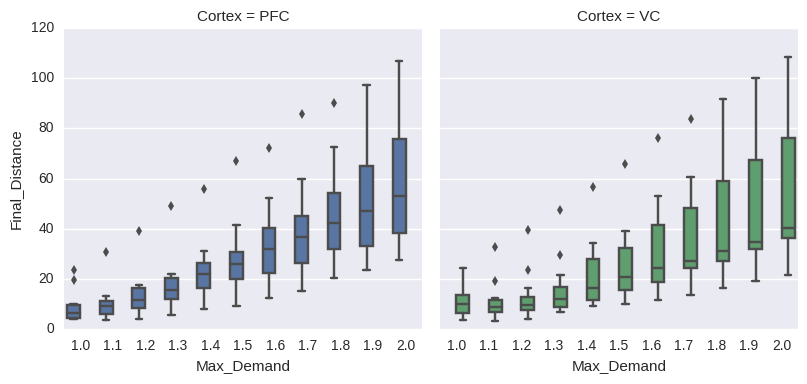

In [12]:
g=sns.factorplot(data=overnight_df, x='Max_Demand', y='Final_Distance',
                 hue='Cortex', col='Cortex', kind='box', col_wrap=3)

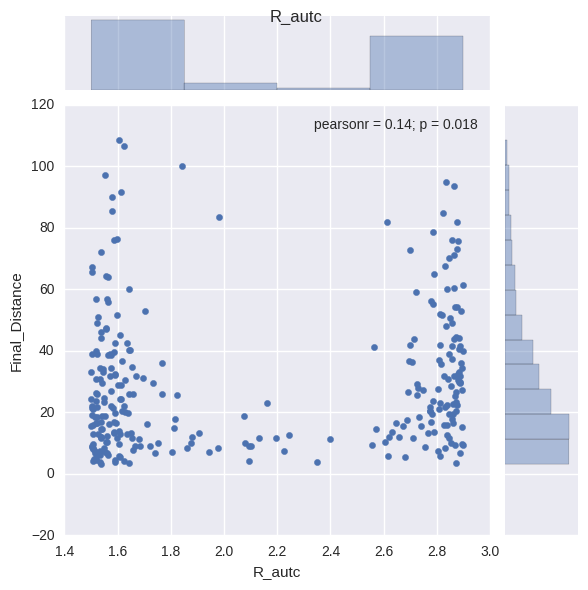

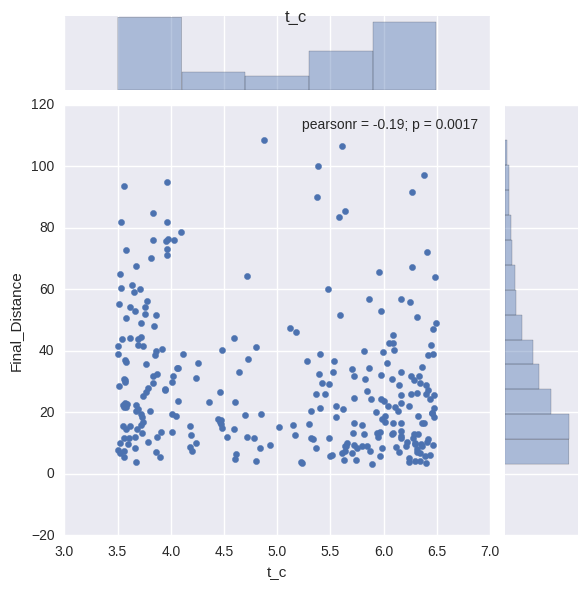

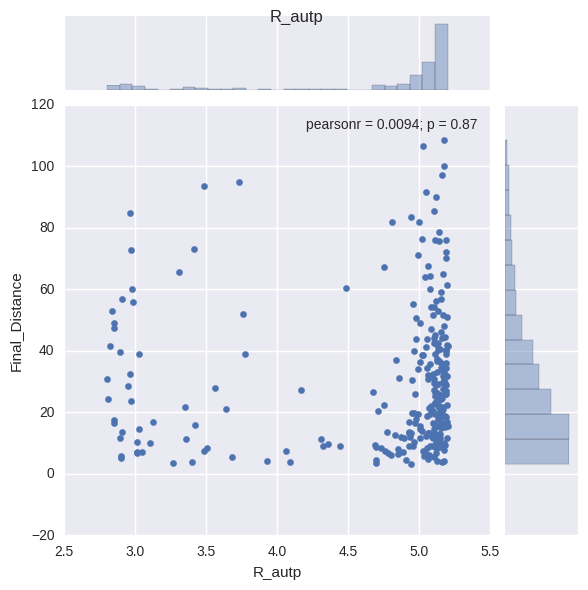

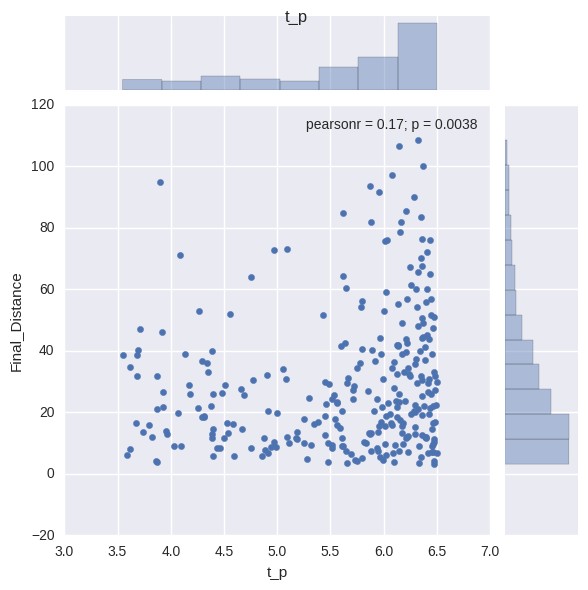

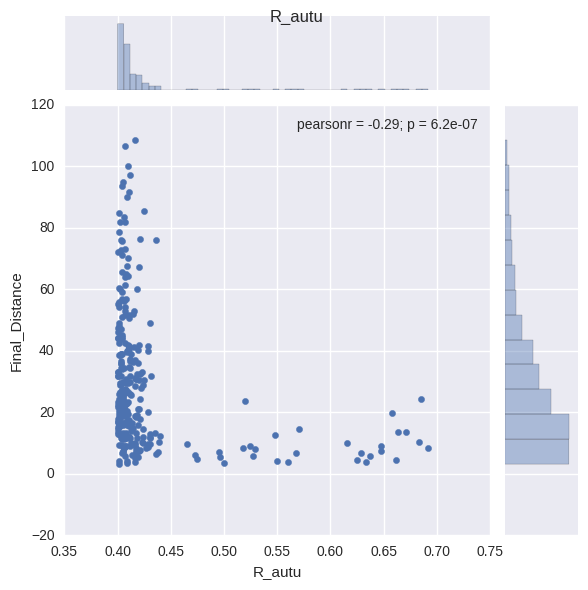

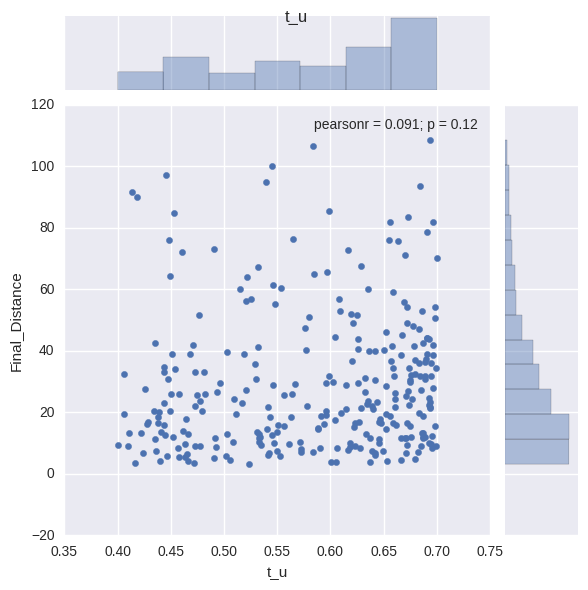

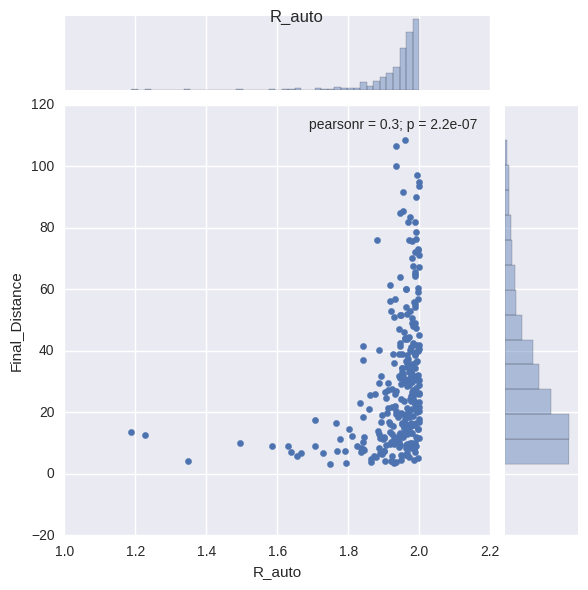

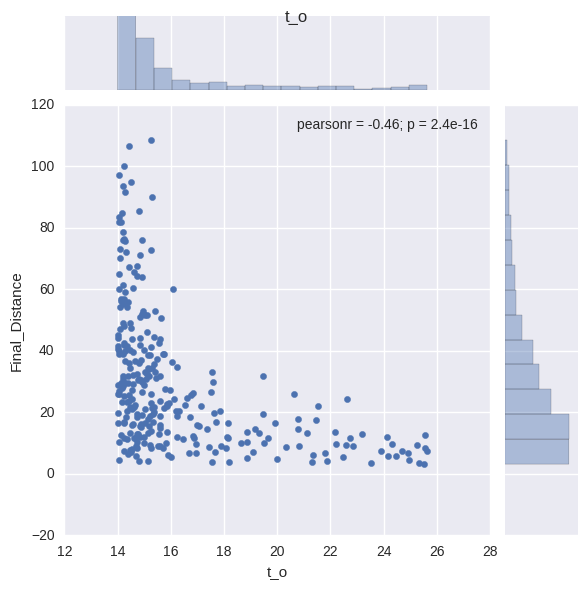

In [14]:
param_list = ['R_autc', 't_c', 'R_autp', 't_p', 'R_autu', 't_u', 'R_auto', 't_o']
for parameter in param_list:
    plt.figure()
    g = sns.jointplot(parameter, 'Final_Distance', overnight_df)
    g.fig.suptitle(parameter)

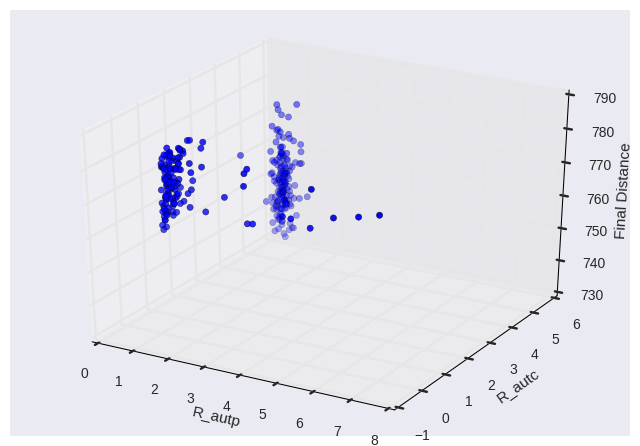

In [12]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
threedee = plt.figure().gca(projection='3d')
threedee.scatter(overnight_df['R_autp'], overnight_df['R_autc'], overnight_df['Final_Distance'])
threedee.set_xlabel('R_autp')
threedee.set_ylabel('R_autc')
threedee.set_zlabel('Final Distance')
plt.show()